In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_mixtes = pd.read_csv("../data/contexte/contexte_mixtes.csv")
df_feminins = pd.read_csv("../data/contexte/contexte_feminins.csv")
df_masculins = pd.read_csv("../data/contexte/contexte_masculins.csv")

In [26]:
df_feminins_sorted = df_feminins.sort_values(by='Titre')
df_masculins_sorted = df_masculins.sort_values(by='Titre')
df_mixtes_sorted = df_mixtes.sort_values(by='Titre')

df_feminins_grouped = df_feminins_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()

df_masculins_grouped = df_masculins_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()

df_mixtes_grouped = df_mixtes_sorted.groupby('Titre').agg({
    'Auteur': lambda x: ', '.join(x),
    'Nbr_pages': 'first'
}).reset_index()


In [13]:
def aggregate_titles(df):
    df['Titre'] = df['Titre'].str[:3]
    df_grouped = df.groupby('Titre').agg({
        'Auteur': lambda x: ', '.join(x),
        'Nbr_pages': 'sum'
    }).reset_index()
    return df_grouped

df_feminins_aggregated = aggregate_titles(df_feminins_grouped)
df_masculins_aggregated = aggregate_titles(df_masculins_grouped)
df_mixtes_aggregated = aggregate_titles(df_mixtes_grouped)


In [14]:
import matplotlib.pyplot as plt

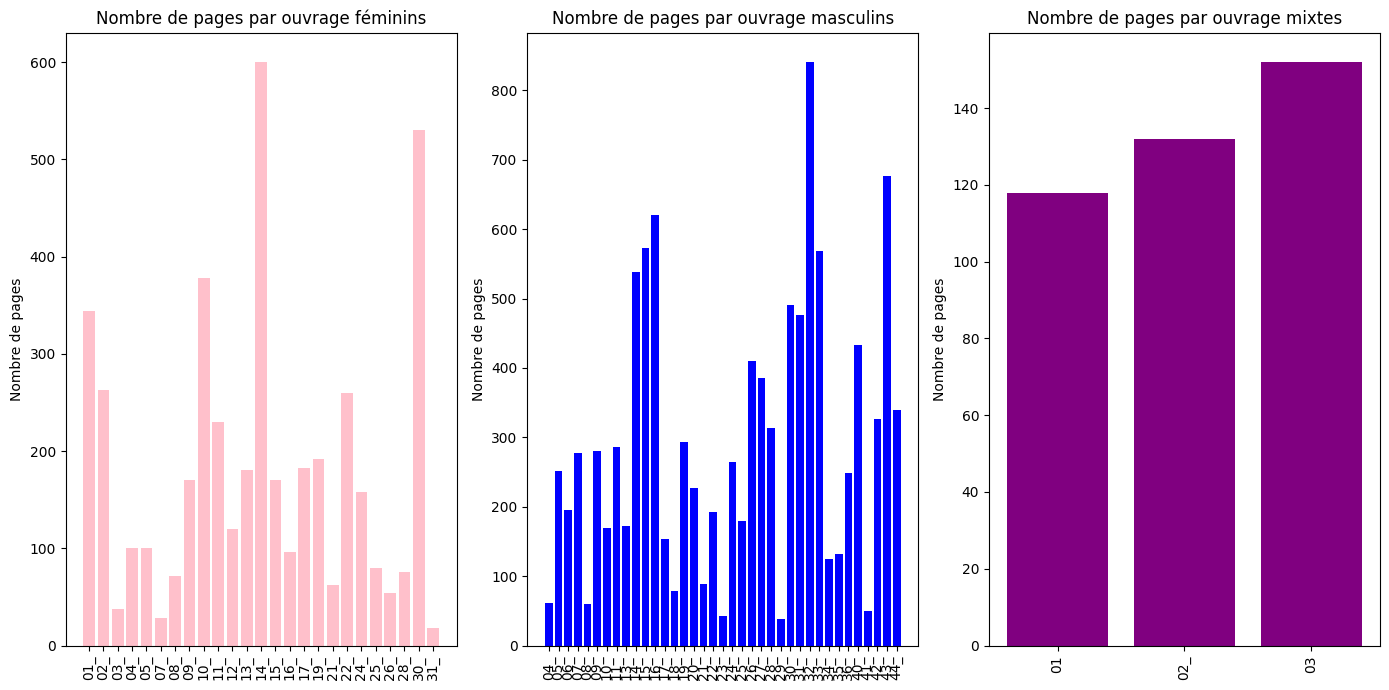

In [21]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.bar(df_feminins_aggregated['Titre'], df_feminins_aggregated['Nbr_pages'], color='pink')
plt.title('Nombre de pages par ouvrage féminins')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
plt.bar(df_masculins_aggregated['Titre'], df_masculins_aggregated['Nbr_pages'], color='blue')
plt.title('Nombre de pages par ouvrage masculins')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
plt.bar(df_mixtes_aggregated['Titre'], df_mixtes_aggregated['Nbr_pages'], color='purple')
plt.title('Nombre de pages par ouvrage mixtes')
plt.ylabel('Nombre de pages')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

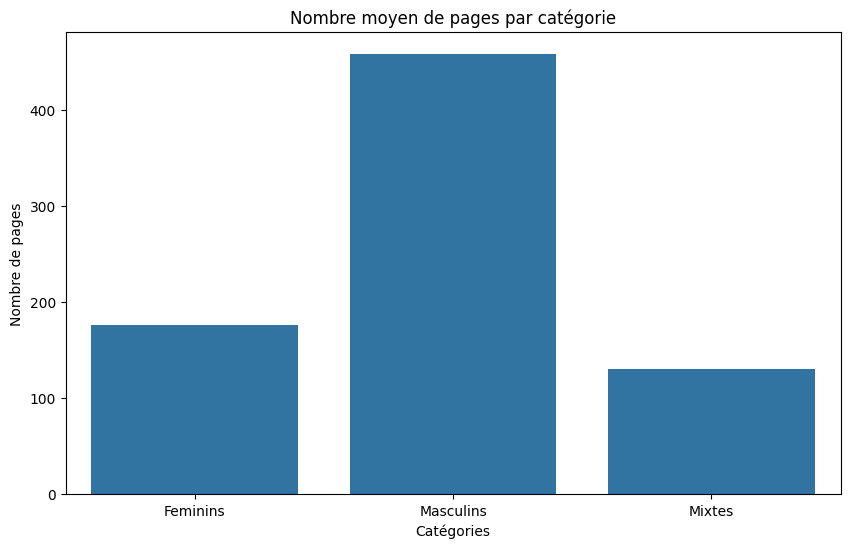

In [24]:
# Calculate the average number of pages for each category
avg_pages_feminins = df_feminins['Nbr_pages'].mean()
avg_pages_masculins = df_masculins['Nbr_pages'].mean()
avg_pages_mixtes = df_mixtes['Nbr_pages'].mean()

avg_pages_df = pd.DataFrame({
    'Categories': ['Feminins', 'Masculins', 'Mixtes'],
    'Moyenne de pages': [avg_pages_feminins, avg_pages_masculins, avg_pages_mixtes]
})

# Plot the average number of pages
plt.figure(figsize=(10, 6))
sns.barplot(x='Categories', y='Moyenne de pages', data=avg_pages_df)
plt.title('Nombre moyen de pages par catégorie')
plt.ylabel('Nombre de pages')
plt.xlabel('Catégories')
plt.show()

In [25]:
total_pages_feminins = df_feminins['Nbr_pages'].sum()
total_pages_masculins = df_masculins['Nbr_pages'].sum()
total_pages_mixtes = df_mixtes['Nbr_pages'].sum()

total_pages = total_pages_feminins + total_pages_masculins + total_pages_mixtes

print(f"Total des pages féminins: {total_pages_feminins}")
print(f"Total des pages masculins: {total_pages_masculins}")
print(f"Total des pages mixtes: {total_pages_mixtes}")
print(f"Total des pages: {total_pages}")

Total des pages féminins: 29785.0
Total des pages masculins: 132265.0
Total des pages mixtes: 652
Total des pages: 162702.0
